# Analytical computation of the dynamics of the groudnwater level in land between parallel ditches

See report "Regionale modellering van waterbalansen en grondwater regime Waternet: Matlab-implementatie van de bakjes-modellering"

Theo Olsthoorn
27 januari 2011

The implementation is in Python instead of in Matlab

The head $h$ in an aquifer with constant transmissivity $kD$ without leakage can be derived for a symmetrical cross section of width $2b$ between ditches with the same water level $h_{LR}$ head on both sides.

The differential equation is

$$ \frac{d^2h}{dx^2} = -\frac{N}{kD}$$

and can be intergrated twice to get

$$h = -\frac{N}{kD}\frac{x^2}{2} + C_1 x + C_2$$

The symmetry makes that $C_1=0$. With entry resistance we $w$ and aquifer thickness $D$ have
$$-kD\left(\frac{dh}{dx}\right)_{x=b} = \frac{D}{w}\left(h_b-h_{LR}\right)$$

filled in

$$-kD\left(-\frac{Nb}{kD}\right) = \frac{D}{w}\left(-\frac{Nb^2}{2 kD} + C_2 - h_{LR}\right)$$

so that

$$C_2 = \frac{w}{D}Nb +\frac{Nb^2}{2 kD} +  h_{LR}$$

and, finally we get

$$h -h_{LR} = \frac{N\left(b^2-x^2\right)}{2kD} + \frac{w}{D}N b$$

This reveals that the solution is that of the case without ditch resistance, which is uplifted by the amount that caused by the flow of the water from half the cross section through the resistance at the ditch on each side of the cross section.

Written out as water balance

$$0=N-\frac{kD}{b}\frac{\left(\overline{h}-h_{LR}\right)}{\left(\frac{b}{3}+kw\right)}$$

Changing to transient, adding to storage when not in equilibrium yields

$$\left(\frac{b^{2}}{3kD}\mu\right)\frac{dh}{dt}=-\left(\overline{h}-\left(\frac{Nb^{2}}{3kD}+h_{LR}\right)\right)$$

Which can be written as

$$T\frac{d\left(h-\overline{h}_{\infty}\right)}{dt}=-\left(\overline{h}-\overline{h}_{\infty}\right)$$
with

$$\overline{h}_{\infty}=\frac{Nb^{2}}{3kD}+h_{LR}$$

and

$$T=\frac{b^{2}}{3kD}\mu$$

After integration and filling the integration constant by using at $t=t_0$ we have 
$\overline h = \overline h_0$, yields

$$\overline{h}=\overline{h}_{0}e^{-\frac{t-t_{0}}{T}}+\overline{h}_{\infty}\left(1-e^{-\frac{t-t_{0}}{T}}\right)$$

and after filling the expression for $\overline h_\infty$, we get

$$\overline{h}-h_{LR}=\left(\overline{h}_{0}-h_{LR}\right)e^{-\frac{t-t_{0}}{T}}+\left(\frac{Nb^{2}}{3kD}\right)\left(1-e^{-\frac{t-t_{0}}{T}}\right)$$

which clearly shows the two competing processes at the right-hand side of the equation, namely declining to ditch level without recharge and striving to long-term equilibrium with constant recharge.

Solution 7 on page 96 by Carslaw & Jaeger (1958) can be converted to the situation where $x=0$ is in the center of the slab between two walls with tempeature zero having initially a uniform temperature. Converted to groundwater flow in an aquifer with constant transmissivity

$$h = \frac{4 \overline h_0}{\pi}\sum_{i=1}^{\infty}\left[
\frac{\left(-1\right)^\left(i-1\right)}{2i-1}\cos\left(\left(2i-1\right)\frac{\pi}{2}\frac{x}{b}\right)
\exp\left(-\left(2i-1\right)^2\frac{t}{T}\right)
\right]$$

with

$$T=\left(\frac {2 b}{\pi}\right)^2\frac{\mu}{kD}$$

The average head over the cross section can be obtained by integrating the cosine under the sum between 0 and $b$ and deviding by $b$. This yields

$$\overline h = 2 \overline h_0\sum_{i=1}^\infty\left[
\frac{\left(-1\right)^{i-1}}{\left(2i - 1\right)^2}
\sin\left(\left(2i - 1\right)\frac{\pi}{2}\right)
\exp\left(-\left(2i - 1\right)^2\frac{t}{T}\right)
\right]
$$

The last 2 equations for $\overline h$ can be used to simulate the head by convolution. The solution can be seen the impulse response due to a sudden recharge with a given total amount of $P$ [L], so that $\overline h_0 = \Delta \overline h_0 = \frac{P}{\mu}$. The can equally wall be treated as the impulse response due to a sudden change of ditch water level, such hat $\overline h_0 = \Delta \overline h_0 = -\Delta h_{LR}$.

## Half time
We will use the half time when showing the results.

The half time is when sufficiently large so that onlu the first term in de series matters and the decline of the head acts in time like a negative exponent.

$$h\sim\exp\left(-\frac{t}{T}\right)$$

The half time follows from

$$\exp\left(-\frac{t+T_{50}}{T}\right) = 0.5\exp\left(-\frac{t}{T}\right)$$

$$\exp\left(\frac{t+T_{50}}{T}\right) = 2\exp\left(\frac{t}{T}\right)$$

$$\frac{t+T_{50}}{T} = \ln 2 + \frac{t}{T}$$

$$T_{50} = \ln\left(2\right) T$$

## Test data

In [135]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pdb
from scipy.signal import lfilter

import os
import sys
TOOLS = '~/GRWMODELS/python'
GGOR = os.path.expanduser('~/GRWMODELS/python/GGOR/src/analytic')
sys.path.insert(0, GGOR)

import ggor_analytical as ga

In [165]:
prpcols = [ 'b', 'k', 'D', 'mu']
prpdata = [[ 75., 5., 5., 0.25],
           [ 75., 5., 5., 0.15],
           [ 75., 5., 5., 0.08],
           [ 75., 5., 5., 0.04],
           [ 75., 5., 5., 0.02],
        ]

prcols = ['time',       'N', 'hlr', 'P']
if True:
    prcols = ['time',       'hlr', 'P', 'N']
    prdata = [['2020-01-01', 0.,  0., 0.00],
              ['2020-03-01', 0.,  1., 0.05],
              ['2020-06-01', 0.,  2., 0.10],
              ['2020-09-01', 0.,  1., 0.10],
              ['2021-01-01', 0.,  0., 0.00],
              ['2021-03-01', 0., -2.,-0.10],
              ['2021-06-01', 0.,  0., 0.00]]
else:
    prcols = ['time',       'N', 'hlr', 'P']
    prdata = [['2020-01-01', 0.,  0., 0.00],
              ['2020-03-01', 0.,  1., 0.05],
              ['2020-06-01', 0.,  2., 0.10],
              ['2020-09-01', 0.,  1., 0.05],
              ['2021-01-01', 0.,  0., 0.00],
              ['2021-03-01', 0., -2.,-0.10],
              ['2021-06-01', 0.,  0., 0.00]]

propdata = pd.DataFrame(prpdata, columns=prpcols)
perdata  = pd.DataFrame(prdata,  columns=prcols)
perdata.index = [pd.Timestamp(k) for k in perdata['time']]
perdata = perdata.drop(columns='time')

tindex = pd.date_range(perdata.index[0], perdata.index[0] + np.timedelta64(720, 'D'))
tcols = ['h', 'hb', 'hx0', 'hx1', 'hx2']
tdata = pd.DataFrame(index=tindex, columns=tcols)

## Simulate the first derived analytical solution without leakage

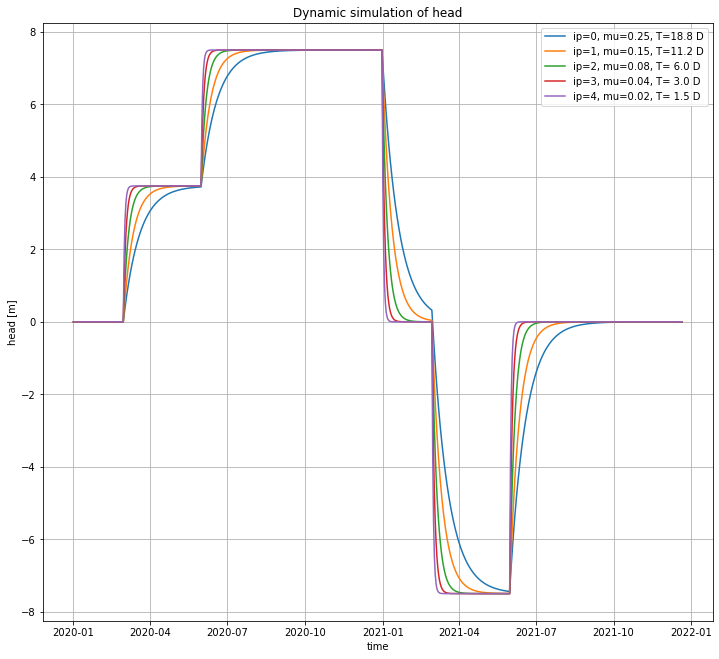

In [166]:
ax = ga.newfig("Dynamic simulation of head", "time", "head [m]")

for ip in range(len(propdata)):
    p = propdata.iloc[ip]
    b, mu, k, D = p[['b', 'mu', 'k', 'D']]
    T = b ** 2 * mu / (3 * k * D)
    A = b ** 2      / (3 * k * D)
    tprev, hprev = tdata.index[0], perdata['hlr'].iloc[0]
    tdata.loc[tprev, ['h', 'hb', 'hx0', 'hx1', 'hx2']] = hprev, 0., 0., 0., 0.
    for t in tdata.index:
        tper = perdata.index[perdata.index <= t][-1]
        d = perdata.loc[tper]
        N, hlr = d[['N', 'hlr']]
        dt = (t - tprev) / np.timedelta64(1, 'D') 
        e = np.exp(-dt / T)
        h = hlr + (hprev - hlr) * e + N * A * (1 - e)
        tdata.loc[t, ['h', 'hb', 'hx0', 'hx1', 'hx2']] = h, 0., 0., 0., 0.
        tprev, hprev = t, h
        
    ax.plot(tdata.index, tdata['h'], label='ip={}, mu={:3.2f}, T={:4.1f} D'.format(ip, mu, T))
ax.legend()

# Analytical decay solution for for initially uniform head

## Simulaton by convolution

## Carslaw & Jaeger (1958) / Kraaijenhoff van der Leur

### The decaying water table as a function of $x$ in a symmetrical cross section with the heads at $x\pm b = 0$ and initially a uniform head $\overline h_0$

$$h = \frac{4 \overline h_0}{\pi}\sum_{i=1}^{\infty}\left[
\frac{\left(-1\right)^\left(i-1\right)}{2i-1}\cos\left(\left(2i-1\right)\frac{\pi}{2}\frac{x}{b}\right)
\exp\left(-\left(2i-1\right)^2\frac{t}{T}\right)
\right]$$

with

$$T=\left(\frac {2 b}{\pi}\right)^2\frac{\mu}{kD}$$

## Implentation for many $x$ and one $t$

In [156]:
def KLx(h0=None, t=None, b=None, mu=None, kD=None, x=None, npoints=101, TOL=1e-6):
    '''Return h(x, t) known as Kraaienhoff van der Leur, many x, one t.
    
    Parameters
    ----------
    h0: float
        head change at x +/- b
    t: float
        time
    b: float
        half width of cross section [m]
    mu: float
        specific yield
    kD: float
        transmssivity [L2/T]
    x: float or ndarray
        x value[s] for which to compute the head
        if x is None, then npoints will be used across the section
    npoints: int
        number of points in cross section to compute [default = 101]
    TOL: float
        solution accuracy [L]
        
    Returns
    -------
    h, x: tuple of two nd.arrays of shape(len(x))
        head and x coorinates for time t
    '''   
    T = (2 * b / np.pi) ** 2 * mu / kD # characteristic system time
    if x is None:
        x = np.linspace(-b, +b, npoints)  # points to compute h

    som = np.zeros_like(x)
    for j in range(1, 100):
        j2m1 = 2 * j - 1
        dsom = (-1) ** (j - 1) / j2m1 * np.cos(
                        j2m1 * (np.pi / 2)* (x / b) )* np.exp(-j2m1 ** 2 * t / T)
        som += dsom
        if np.all(np.abs(dsom)) < TOL:
            break
    return 4 * h0 / np.pi * som, x  # x is included in the output tuple

## Implementation for one $x$ and many times $t$

In [178]:
def KLt(h0=None, t=None, b=None, mu=None, kD=None, x=None, TOL=1e-6):
    '''Return h(x, t) known as Kraaienhoff van der Leur, one x, many t.
    
    Parameters
    ----------
    ah0: float
        head change at x +/- b
    t: float or ndarray
        time
    b: float
        half width of cross section [m]
    mu: float
        specific yield
    kD: float
        transmssivity [L2/T]
    x: float
        x at which to compute the head
    TOL: float
        solution accuracy [L]
        
    Returns
    -------
    h: ndarray
        head at x for all times t
    '''   
    T = (2 * b / np.pi) ** 2 * mu / kD # characteristic system time
    
    if np.isscalar(x):
        pass
    else:
        raise ValueError('x must be a scalar.')

    h = np.zeros_like(t)
    for j in range(1, 100):
        j2m1 = 2 * j - 1
        dh = (-1)**(j-1) / j2m1 * np.cos(
                        j2m1 * (np.pi / 2)* (x / b)) * np.exp(-j2m1**2 * t / T)
        h += dh
        if np.all(np.abs(dh) < TOL):
            break
    return 4 * h0 / np.pi * h, t  # times included in the output tuple

## KvdL, average head over the cross section for many $t$

$$\overline{h}=2\overline{h}_{0}\sum_{i=1}^{\infty}\frac{\left(-1\right)^{i-1}}{\left(2i-1\right)^{2}}\sin\left(\left(2i-1\right)\frac{\pi}{2}\right)\exp\left(-\left(2i-1\right)^{2}\frac{t}{T}\right)$$

In [179]:
def KLavg(h0=None, t=None, b=None, mu=None, kD=None, TOL=1e-6):
    '''Return mean(h(x)) many times, where h is known as KvdL.
    
    Parameters
    ----------
    h0: float
        head change at x +/- b
    t: ndarray
        time
    b: float
        half width of cross section [m]
    mu: float
        specific yield
    kD: float
        transmssivity [L2/T]
    npoints: int
        number of points in cross section to compute [default = 101]
    TOL: float
        solution accuracy [L]
        
    Returns
    -------
    h: ndarray of len(t)
    '''   
    T = (2 * b / np.pi) ** 2 * mu / kD # characteristic system time

    som = np.zeros_like(t)
    for j in range(1, 100):
        j2m1 = 2 * j - 1
        dsom = (-1)**(j-1) / j2m1 ** 2 * np.sin(
                        j2m1 * (np.pi / 2)) * np.exp(-j2m1**2 * t / T)
        som += dsom
        if np.all(np.abs(dsom) < TOL):
            break
    return 8 * h0 / np.pi ** 2  * som, t

## Simulations using KvdL equations

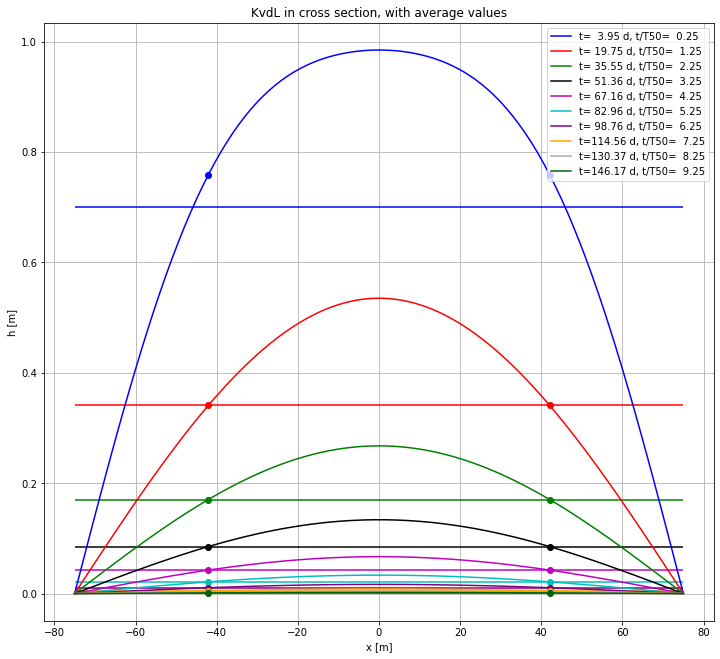

In [197]:
ax = ga.newfig('KvdL in cross section, with average values', 'x [m]', 'h [m]')

for ip in range(len(propdata)):
    if ip !=0:
        break
    b, k, D, mu = propdata.loc[ip, ['b', 'k', 'D', 'mu']]
    T = mu / (k * D) * (2 * b / np.pi) ** 2
    T50 = np.log(2) * T
    times = 0.25 * T50 + np.arange(10.)  * T50
    h0 = 1.0
    npoints = 101

    # |x| where curved h equals mean h for large t
    xo = b * 2/np.pi * np.arccos(2 / np.pi)
    
    clrs = ['b', 'r', 'g', 'k', 'm', 'c', 'purple', 'orange', 'darkgray', 'darkgreen', 'gold']
    for t, clr in zip(times, clrs):
        h, x  = KLx(h0=h0, t=t, b=b, mu=mu, kD=k * D, npoints=npoints)
        ln = ax.plot(x, h, color=clr, label='t={:6.2f} d, t/T50={:6.2f}'.format(t, t/T50))

        ho, _  = KLx(h0=h0, t=t, b=b, mu=mu, kD=k * D, x=xo)
        ax.plot([-xo, xo], [ho, ho], color=ln[0].get_color(), ls='none', marker='o')
    ax.legend()
    ht, _ = KLavg(h0=h0, t=times, b=b, mu=mu, kD=k * D)
    ax.hlines(ht, -b, b, colors=clrs)


The cures show the head at different times, each one halftime apart. Therefore the height of each curve is always half the height of the one before (the next higher one). This is proven in the next example.

The section average values are also shown as horizontal lines in the same color as their curved spatial counterparts.

The dots are the points of the curved lines where $x/b = \pm 2/\pi \arccos(2/\pi)=0.561..$ which is where the curved lines equal the average lines for large times.

## Simulations using KvdL as function $t$ for varius $x$

h[:-1] / h[1:] = 
 [2.00777942 2.00003039 2.00000012 2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.        ]


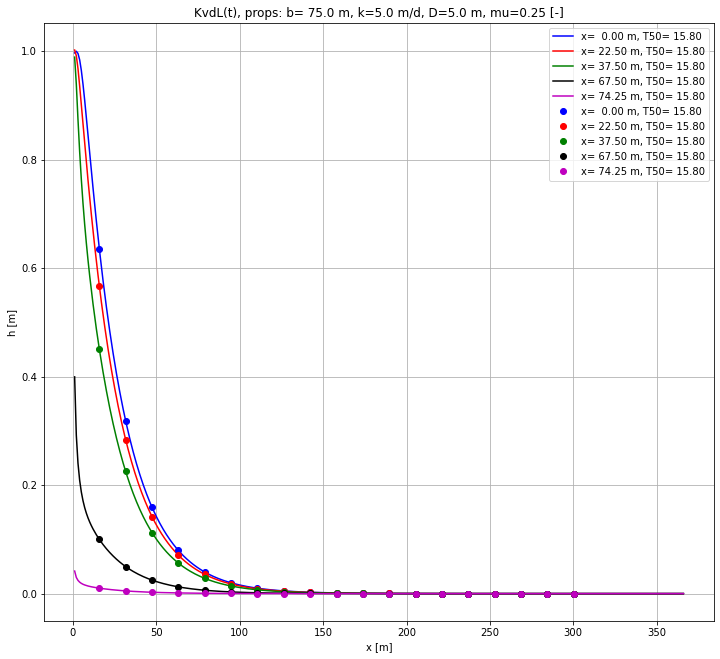

In [160]:
for ip in range(len(propdata)):
    if ip !=0:
        break
    b, k, D, mu = propdata.loc[ip, ['b', 'k', 'D', 'mu']]
    T = mu / (k * D) * (2 * b / np.pi) ** 2
    T50 = np.log(2) * T
    h0 = 1.0

    ttl = "KvdL(t), props: b= {} m, k={} m/d, D={} m, mu={} [-]".format(b, k, D, mu)
    ax = ga.newfig(ttl, 'x [m]', 'h [m]')
    
    clrs = ['b', 'r', 'g', 'k', 'm', 'c']
    xs = np.array([0, 0.3, 0.5, 0.9, 0.99]) * b
    
    time = np.linspace(1, 366, 365)
    for x, clr in zip(xs, clrs):
        h, t = KLt(h0=h0, t=time, b=b, mu=mu, kD=k * D, x=x)
        ax.plot(time, h, clr, label='x={:6.2f} m, T50={:6.2f}'.format(x, T05))

    # Using halftimes to show as dots
    time = np.arange(1, 20) * T50
    for x, clr in zip(xs, clrs):
        h, t = KLt(h0=h0, t=time, b=b, mu=mu, kD=k * D, x=x)
        ax.plot(time, h, 'o' + clr, label='x={:6.2f} m, T50={:6.2f}'.format(x, T05))
        
    ax.legend()
    
    # Prove that the half time is correct by showing the ratio:
    print("h[:-1] / h[1:] = \n", h[:-1] / h[1:])

The example shows the development of the head at different values of $x$ in the cross section as a function of time. The dots indicates the values one halftime apart. The print aboven the figure proves that the halftime is correct.

## Simulation by convolution

### Responses

The KvdL solution with $h0 = P / \mu$ can be regarded as an impulse response if $P = 1$. We get a block response by dividing by the length of the time steps to be used in the convolution.

$$BR\left(P, d\tau\right)  =\frac{8}{\pi^{2}}\frac{P}{\mu dt}\sum_{i=1}^{\infty}\frac{\left(-1\right)^{i-1}}{\left(2i-1\right)^{2}}\sin\left(\left(2i-1\right)\frac{\pi}{2}\right)\exp\left(-\left(2i-1\right)^{2}\frac{\tau}{T}\right)$$

In which $P$ should be unity and in fact dimensionless. We use $\tau$ instead of $t$ because the response is for time relative to the observation and not real time.

The convolution is done using the filter function from scipy.signal.

`scipy.signal.convolve(p, BR, method='same')`

In [161]:
# Generate input

t2data = pd.DataFrame(index = tdata.index, columns=['N'])
for t in t2data.index:
    period = perdata.index[perdata.index <= t][-1]
    t2data.loc[t, 'N'] = perdata.loc[period, 'N'] 

In [180]:
def BR(b=None, kD=None, mu=None, tau=None, TOL=1e-20):
    """Return Block Response for section averaged head acc. to KvdL
    
    Parameters
    ----------
    b: float
        width of cross section
    kD: float
        transmissivity [L2/T]
    mu: float
        specific yield [-]
    tau: ndarray, equidistant
        times
    TOL: float
        tolerance to break iteration
    """    
    T = (2 * b / np.pi) ** 2 * mu / (k * D)
    taum = 0.5 * (tau[:-1] + tau[1:])
    som = 0.
    for i in range(1000):
        i2m1 = 2 * i - 1
        dsom = (-1) ** (i-1) / i2m1 ** 2 * np.sin(
            i2m1 * np.pi / 2) * np.exp(- i2m1 ** 2 * taum  / T)
        som += dsom
        if np.all(np.abs(dsom) < TOL):
            break
    # 1/ mu / dau must be the value at tau=0
    return np.hstack((0, som / np.diff(tau))) * 8 / np.pi ** 2 / mu

## Show results of convolution

1. With the block response for the section-avarged heads
2. For the head at $\left|x_o\right| = b \frac{2}{\pi}\arccos\frac{2}{\pi}=0.561... b$.

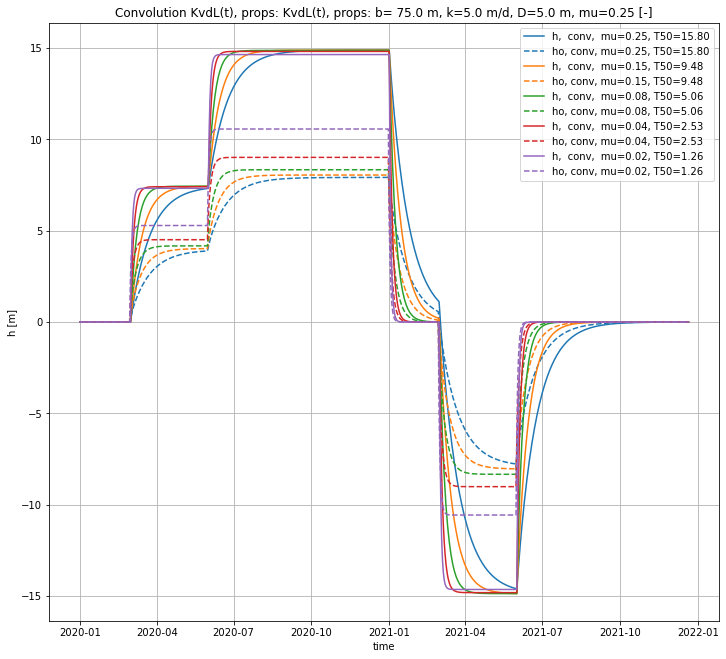

In [199]:
tau = (t2data.index - t2data.index[0]) / np.timedelta64(1, 'D')

b, k, D = propdata.loc[0, ['b', 'k', 'D']]

ttl0 ="Convolution KvdL(t), props: " 
ttl1 = "b= {} m, k={} m/d, D={} m [-]".format(b, k, D)
ax = ga.newfig(ttl0 + ttl, 'time', 'h [m]')

# where curved h equals mean h for large t
xo = b * 2/np.pi * np.arccos(2 / np.pi)

for ip in range(len(propdata)):
    mu = propdata.loc[ip, 'mu']
    
    br = BR(b=b, kD=k * D, mu=mu, tau=tau)
    
    br2 = KLt(h0=1. / mu, t=tau, b=b, mu=mu, kD=k * D, x=xo)[0]
    
    T50 = np.log(2) * mu / (k * D) * (2 * b / np.pi) ** 2

    h   = lfilter(br,  1, t2data['N'].values)
    ho  = lfilter(br2, 1, t2data['N'].values)
    
    ln = ax.plot(t2data.index, h, label="h,  conv,  mu={:.2f}, T50={:.2f}".format(mu, T50))
    clr = ln[0].get_color()
    ax.plot(t2data.index, ho, color=clr, ls='--', label="ho, conv, mu={:.2f}, T50={:.2f}".format(mu, T50)) 
ax.legend()

Note that, the smaller the specific yield, the larger the response to a shower. But that shouldn't make any difference for a steady recharge.

This curve can't be correct, because it must conincide with the first curves in this notebook. What causes the error? It's exactly  factor of 2!
@TO 2020-10-06

## Graph of block responses
Showing the block responses for the average head in the cross section and for the head at point $\left|xo\right| = b \frac{2}{\pi} \arccos(\frac{2}{\pi})$

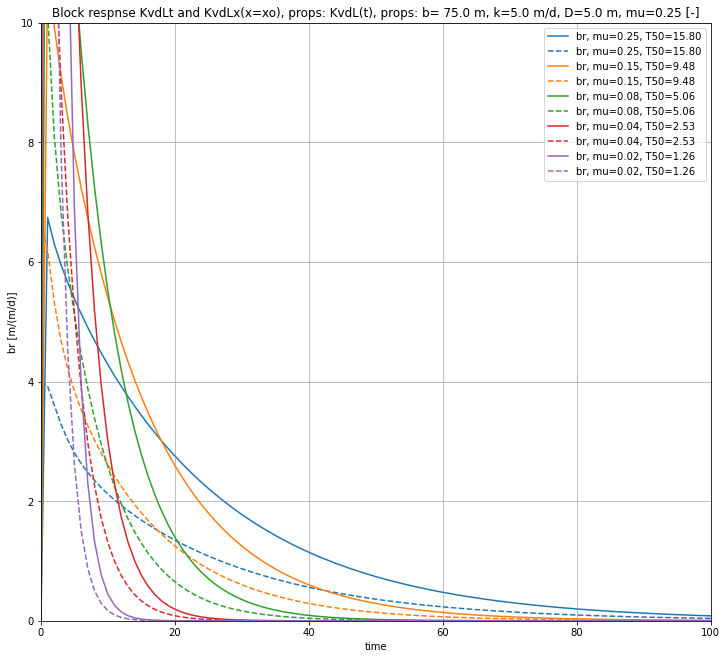

In [203]:
tau = (t2data.index - t2data.index[0]) / np.timedelta64(1, 'D')

b, k, D = propdata.loc[0, ['b', 'k', 'D']]

ttl0 ="Block respnse KvdLt and KvdLx(x=xo), props: " 
ttl1 = "b= {} m, k={} m/d, D={} m [-]".format(b, k, D)
ax = ga.newfig(ttl0 + ttl, 'time', 'br [m/(m/d)]', ylim=[0, 10], xlim=[0, 100])

# |xo| is where curved h equals mean h in the cross section for large t
xo = b * 2/np.pi * np.arccos(2 / np.pi)

for ip in range(len(propdata)):
    mu = propdata.loc[ip, 'mu']
    
    br = BR(b=b, kD=k * D, mu=mu, tau=tau)
    
    # Block response for the pont xo where the average equals the curved drawdown.
    # Using h0=1/mu !
    br2 = KLt(h0=1. / mu, t=tau, b=b, mu=mu, kD=k * D, x=xo)[0]
    
    T50 = np.log(2) * mu / (k * D) * (2 * b / np.pi) ** 2

    ln = ax.plot(tau, br, label="br, mu={:.2f}, T50={:.2f}".format(mu, T50))
    ax.plot(tau, br2, color=ln[0].get_color(), ls='--', label="br, mu={:.2f}, T50={:.2f}".format(mu, T50))        
ax.legend()

Only the dashed blue line for the largest T50 is right or closely richt. The blue line itself and the other non-dashed lines are a factor of 2 to high. So what coulde be the reason of this behavior?